# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [283]:
!pip install ydata_profiling

In [284]:
from ydata_profiling import ProfileReport

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Фиксируем сиды для обеспечения воспроизводимости, чтобы получать одинаковые случайные результаты (разбиение данных, инициализацию моделей), что позволяет однозначно воспроизводить результаты.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [285]:
import pandas as pd

In [286]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [X] Отобразите 30 случайных строк тренировочного датасета.
- [X] Отобразите первые 5 и последние 5 объектов тестового датасета
- [X] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [X] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [X] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [X] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [X] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [287]:
df_train.sample(30)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [288]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [289]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [290]:
# колонки с пропусками
missing_cols = df_train.columns[df_train.isnull().any()].tolist()
missing_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [291]:
# количество пропусков по колонкам
df_train[missing_cols].isnull().sum()

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [292]:
# количество дубликатов
duplicates_count = df_train.duplicated().sum()
int(duplicates_count)

985

In [293]:
df_train[df_train.duplicated(keep=False)].head()

name  year  selling_price  km_driven    fuel  \
28                Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
29         Maruti Omni 8 Seater BSIV  2012         150000      35000  Petrol   
31  Maruti Alto 800 CNG LXI Optional  2019         330000      10000     CNG   
32        Maruti Alto K10 VXI Airbag  2019         366000      15000  Petrol   
33  Hyundai Verna VTVT 1.6 SX Option  2019        1149000       5000  Petrol   

   seller_type transmission         owner      mileage   engine  max_power  \
28  Individual       Manual  Second Owner          NaN      NaN        NaN   
29  Individual       Manual  Second Owner    14.0 kmpl   796 CC     35 bhp   
31  Individual       Manual  Second Owner  33.44 km/kg   796 CC   40.3 bhp   
32  Individual       Manual   First Owner   23.95 kmpl   998 CC   67.1 bhp   
33  Individual       Manual   First Owner    17.0 kmpl  1591 CC  121.3 bhp   

             torque  seats  
28              NaN    NaN  
29  6.1kgm@ 3000rpm    5.0  
31    60Nm@ 3500rpm    4.0  
32    90Nm@ 3500rpm    5.0  
33   151Nm@ 4850rpm    5.0

In [294]:
profile = ProfileReport(df_train, title="Report")
from IPython.display import display
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 19.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [X] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [295]:
train_medians = df_train.median(numeric_only=True)
train_medians

year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64

In [296]:
df_train = df_train.fillna(train_medians)
df_test = df_test.fillna(train_medians)

In [297]:
df_train.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque']

In [298]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
4     Individual       Manual           First Owner  20.14 kmpl  1197 CC   
...          ...          ...                   ...         ...      ...   
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
6994   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996    73.9 bhp             190Nm@ 2000rpm    5.0  
6997      70 bhp        140Nm@ 1800-3000rpm    5.0  
6998      70 bhp        140Nm@ 1800-3000rpm    5.0  

[6999 rows x 13 columns]

Тут остались пропуски в категориальных признаках, так как заполнить категориальные признаки медианой не корректно. В случае c mileage, engine, max_power можно вывести их из категориальных признаков убрав приписки их размерностей и тогда тоже заполнить медианой

In [299]:
def extract(value):
    if pd.isna(value):
        return np.nan

    try:
        return float(str(value).split(' ')[0])
    except:
        return np.nan

In [300]:
df_train['mileage'] = df_train['mileage'].apply(extract)
df_train['engine'] = df_train['engine'].apply(extract)
df_train['max_power'] = df_train['max_power'].apply(extract)

df_test['mileage'] = df_test['mileage'].apply(extract)
df_test['engine'] = df_test['engine'].apply(extract)
df_test['max_power'] = df_test['max_power'].apply(extract)

In [301]:
medians_to_fill = df_train[['mileage', 'engine', 'max_power']].median()

In [302]:
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].fillna(medians_to_fill)
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].fillna(medians_to_fill)

In [303]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  engine  \
0     Individual       Manual           First Owner    23.40  1248.0   
1     Individual       Manual          Second Owner    21.14  1498.0   
2     Individual       Manual           First Owner    23.00  1396.0   
3     Individual       Manual           First Owner    16.10  1298.0   
4     Individual       Manual           First Owner    20.14  1197.0   
...          ...          ...                   ...      ...     ...   
6994  Individual       Manual           First Owner    18.50  1197.0   
6995  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
6996  Individual       Manual           First Owner    19.30  1248.0   
6997  Individual       Manual           First Owner    23.57  1396.0   
6998  Individual       Manual           First Owner    23.57  1396.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
6994      82.85           113.7Nm@ 4000rpm    5.0  
6995     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996      73.90             190Nm@ 2000rpm    5.0  
6997      70.00        140Nm@ 1800-3000rpm    5.0  
6998      70.00        140Nm@ 1800-3000rpm    5.0  

[6999 rows x 13 columns]

In [304]:
df_train.columns[df_train.isnull().any()].tolist()

['torque']

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [X] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [X] Отобразите такие объекты (0.15 балла)
- [X] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [X]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [305]:
features = [col for col in df_train.columns if col != 'selling_price']

duplicate_mask = df_train.duplicated(subset=features, keep=False)
duplicate_mask.sum()

np.int64(1799)

In [306]:
df_train[duplicate_mask].groupby(features).head(2)

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
31            Maruti Alto 800 CNG LXI Optional  2019         330000   
...                                        ...   ...            ...   
6946                    Chevrolet Spark 1.0 LS  2010         114999   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6997                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
22        45000  Petrol  Individual       Manual   First Owner    21.40   
26        25000  Petrol  Individual       Manual   First Owner    16.80   
27        70000  Diesel  Individual       Manual   First Owner    24.30   
29        35000  Petrol  Individual       Manual  Second Owner    14.00   
31        10000     CNG  Individual       Manual  Second Owner    33.44   
...         ...     ...         ...          ...           ...      ...   
6946      60000  Petrol  Individual       Manual  Second Owner    18.00   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6981      24000  Diesel  Individual       Manual   First Owner    24.40   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power               torque  seats  
22    1197.0      83.10       115Nm@ 4000rpm    5.0  
26     796.0      34.20        59Nm@ 2500rpm    8.0  
27    1248.0      88.50       200Nm@ 1750rpm    5.0  
29     796.0      35.00      6.1kgm@ 3000rpm    5.0  
31     796.0      40.30        60Nm@ 3500rpm    4.0  
...      ...        ...                  ...    ...  
6946   995.0      62.00      90.3Nm@ 4200rpm    5.0  
6947   995.0      62.00      90.3Nm@ 4200rpm    5.0  
6981  1498.0      98.63  215Nm@ 1750-3000rpm    5.0  
6984  1498.0      98.63  215Nm@ 1750-3000rpm    5.0  
6997  1396.0      70.00  140Nm@ 1800-3000rpm    5.0  

[1248 rows x 13 columns]

In [307]:
df_train = df_train.drop_duplicates(subset=features, keep='first')
df_train = df_train.reset_index(drop=True)

In [308]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [X] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [X] Приведите тип данных к ``float``.
* [X] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

> Уберите единицы измерения для признаков ``mileage, engine, max_power``. Приведите тип данных к ``float``.

Это сделал при заполнении пропусков

In [309]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [310]:
df_train["mileage"].dtype

dtype('float64')

In [311]:
df_train["engine"].dtype

dtype('float64')

In [312]:
df_train["max_power"].dtype

dtype('float64')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [X] Осуществите приведение столбцов к необходимому типу.

In [313]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["engine"].dtype

dtype('int64')

In [314]:
df_test["engine"] = df_test["engine"].astype(int)
df_test["engine"].dtype

dtype('int64')

In [315]:
df_train["seats"] = df_train["seats"].astype(int)
df_train["seats"].dtype

dtype('int64')

In [316]:
df_test["seats"] = df_test["seats"].astype(int)
df_test["seats"].dtype

dtype('int64')

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [X] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [X] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [317]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
if 'selling_price' in numeric_cols:
    numeric_cols.remove('selling_price')

categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Числовые столбцы: {numeric_cols}")
print(f"Категориальные столбцы: {categorical_cols}")

Числовые столбцы: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
Категориальные столбцы: ['name', 'fuel', 'seller_type', 'transmission', 'owner']


##### Числовые столбцы

In [318]:
df_train[numeric_cols].describe().round(2)

year   km_driven  mileage   engine  max_power    seats
count  5840.00     5840.00  5840.00  5840.00    5840.00  5840.00
mean   2013.43    73952.24    19.43  1429.45      87.91     5.43
std       4.10    60071.14     3.99   485.66      31.64     0.98
min    1983.00        1.00     0.00   624.00       0.00     2.00
25%    2011.00    39000.00    16.95  1197.00      68.00     5.00
50%    2014.00    70000.00    19.30  1248.00      81.86     5.00
75%    2017.00   100000.00    22.30  1498.00      99.00     5.00
max    2020.00  2360457.00    42.00  3604.00     400.00    14.00

In [319]:
df_test[numeric_cols].describe().round(2)

year  km_driven  mileage   engine  max_power    seats
count  1000.00    1000.00  1000.00  1000.00    1000.00  1000.00
mean   2013.68   71393.34    19.34  1454.88      90.84     5.40
std       4.01   48486.22     3.95   522.00      34.89     0.91
min    1995.00    1303.00     0.00   624.00      34.20     4.00
25%    2011.00   37000.00    16.55  1197.00      69.00     5.00
50%    2014.00   61500.00    19.30  1248.00      82.42     5.00
75%    2017.00  100000.00    22.30  1582.00     102.00     5.00
max    2020.00  375000.00    32.26  3604.00     280.00     9.00

##### Категориальные признаки

In [320]:
df_train[categorical_cols].describe(include=['O'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [321]:
df_test[categorical_cols].describe(include=['O'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [322]:
pd.DataFrame({
    'train_mean': df_train[numeric_cols].mean(),
    'test_mean': df_test[numeric_cols].mean(),
    'train_std': df_train[numeric_cols].std(),
    'test_std': df_test[numeric_cols].std(),
    'mean_diff_abs': abs(df_train[numeric_cols].mean() - df_test[numeric_cols].mean()),
    'mean_diff_rel': abs(df_train[numeric_cols].mean() - df_test[numeric_cols].mean()) / df_train[numeric_cols].mean() * 100
}).round(2)

train_mean  test_mean  train_std  test_std  mean_diff_abs  \
year          2013.43    2013.68       4.10      4.01           0.25   
km_driven    73952.24   71393.34   60071.14  48486.22        2558.90   
mileage         19.43      19.34       3.99      3.95           0.09   
engine        1429.45    1454.88     485.66    522.00          25.43   
max_power       87.91      90.84      31.64     34.89           2.93   
seats            5.43       5.40       0.98      0.91           0.02   

           mean_diff_rel  
year                0.01  
km_driven           3.46  
mileage             0.47  
engine              1.78  
max_power           3.34  
seats               0.44

### **Качество данных**
- Train и test распределения схожи - разница средних < 3.5% по всем признакам
- Нет пропусков в числовых признаках после заполнения
- Выбросы в km_driven - максимальное значение 2.36 млн км (при среднем 74к)
- Нулевые значения в mileage и max_power. Возможно, ошибки в данных

### **Распределения числовых признаков**
- **Годы выпуска**: 2011-2017
- **Пробег**: высокий разброс (std=60k), много машин с пробегом 70-100к км
- **Двигатель**: большинство 1.2-1.5 л
- **Мощность**: типично 68-99 л.с.
- **Мест**: в основном 5-местные

### **Категориальные признаки**
- **Высокая уникальность имён** (1924 уникальных на 5840 записей) - признак слабоинформативный
- **Топливо**: преобладают дизельные
- **Тип продавца**: в основном частные лица
- **Коробка передач**: преимущественно механика
- **Владельцы**: в основном первые владельцы

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [X] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [X] Постройте pairplot по тестовым данным
- [X] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

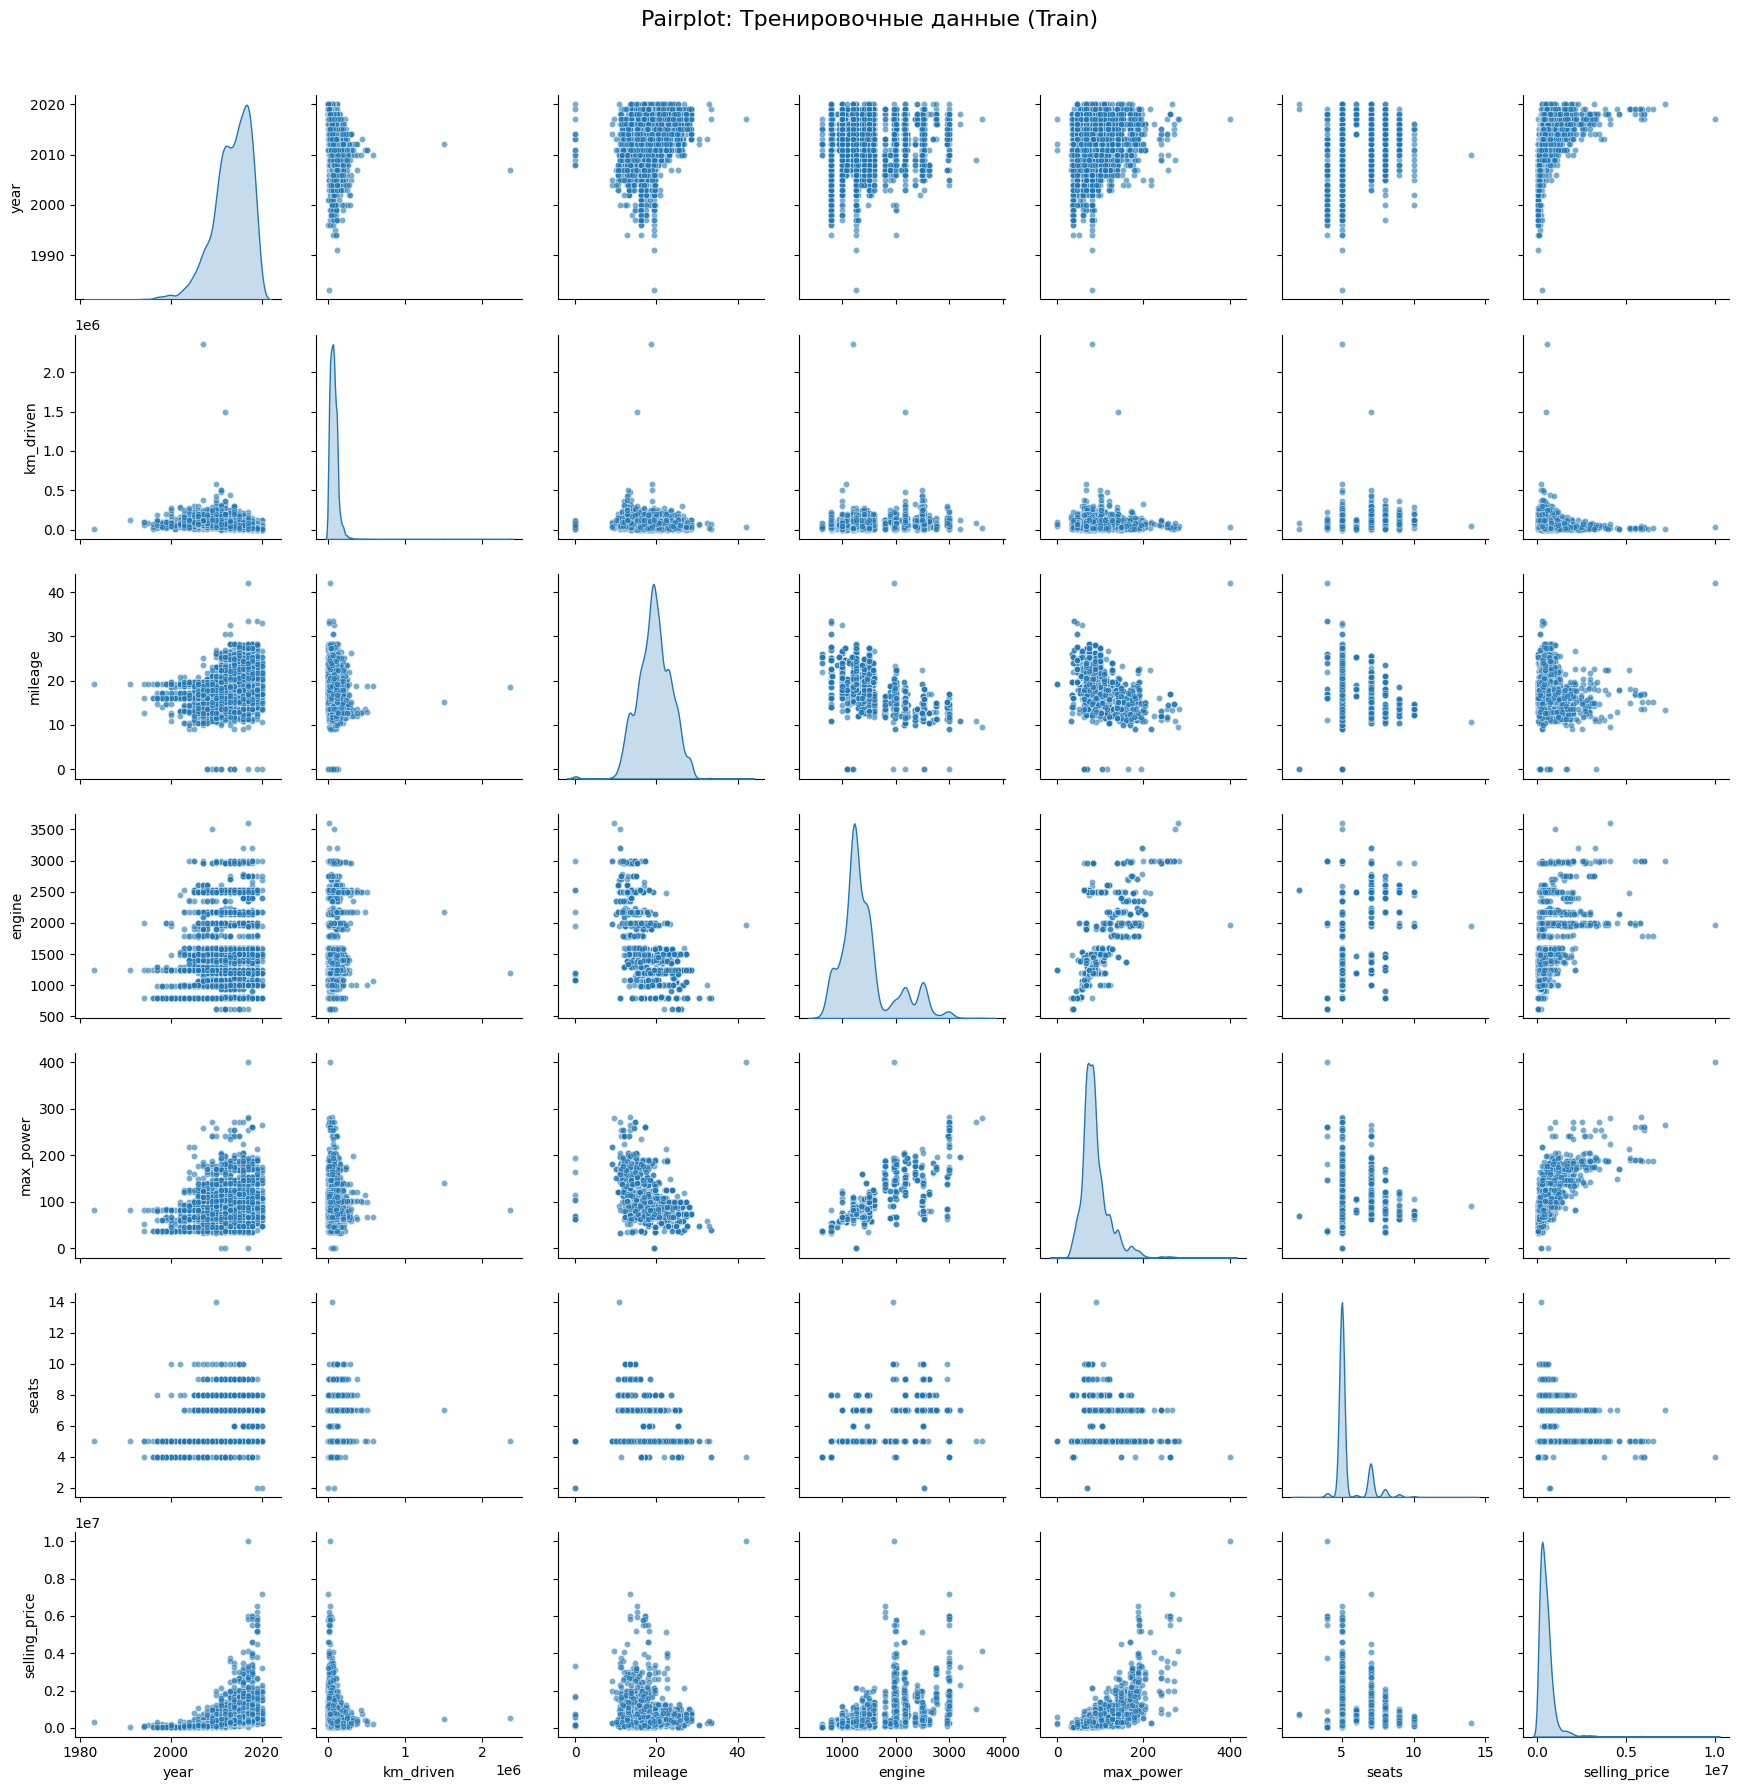

In [324]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

pairplot_train = sns.pairplot(
    df_train[numeric_features],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'fill': True}
)
pairplot_train.fig.suptitle('Pairplot: Тренировочные данные (Train)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

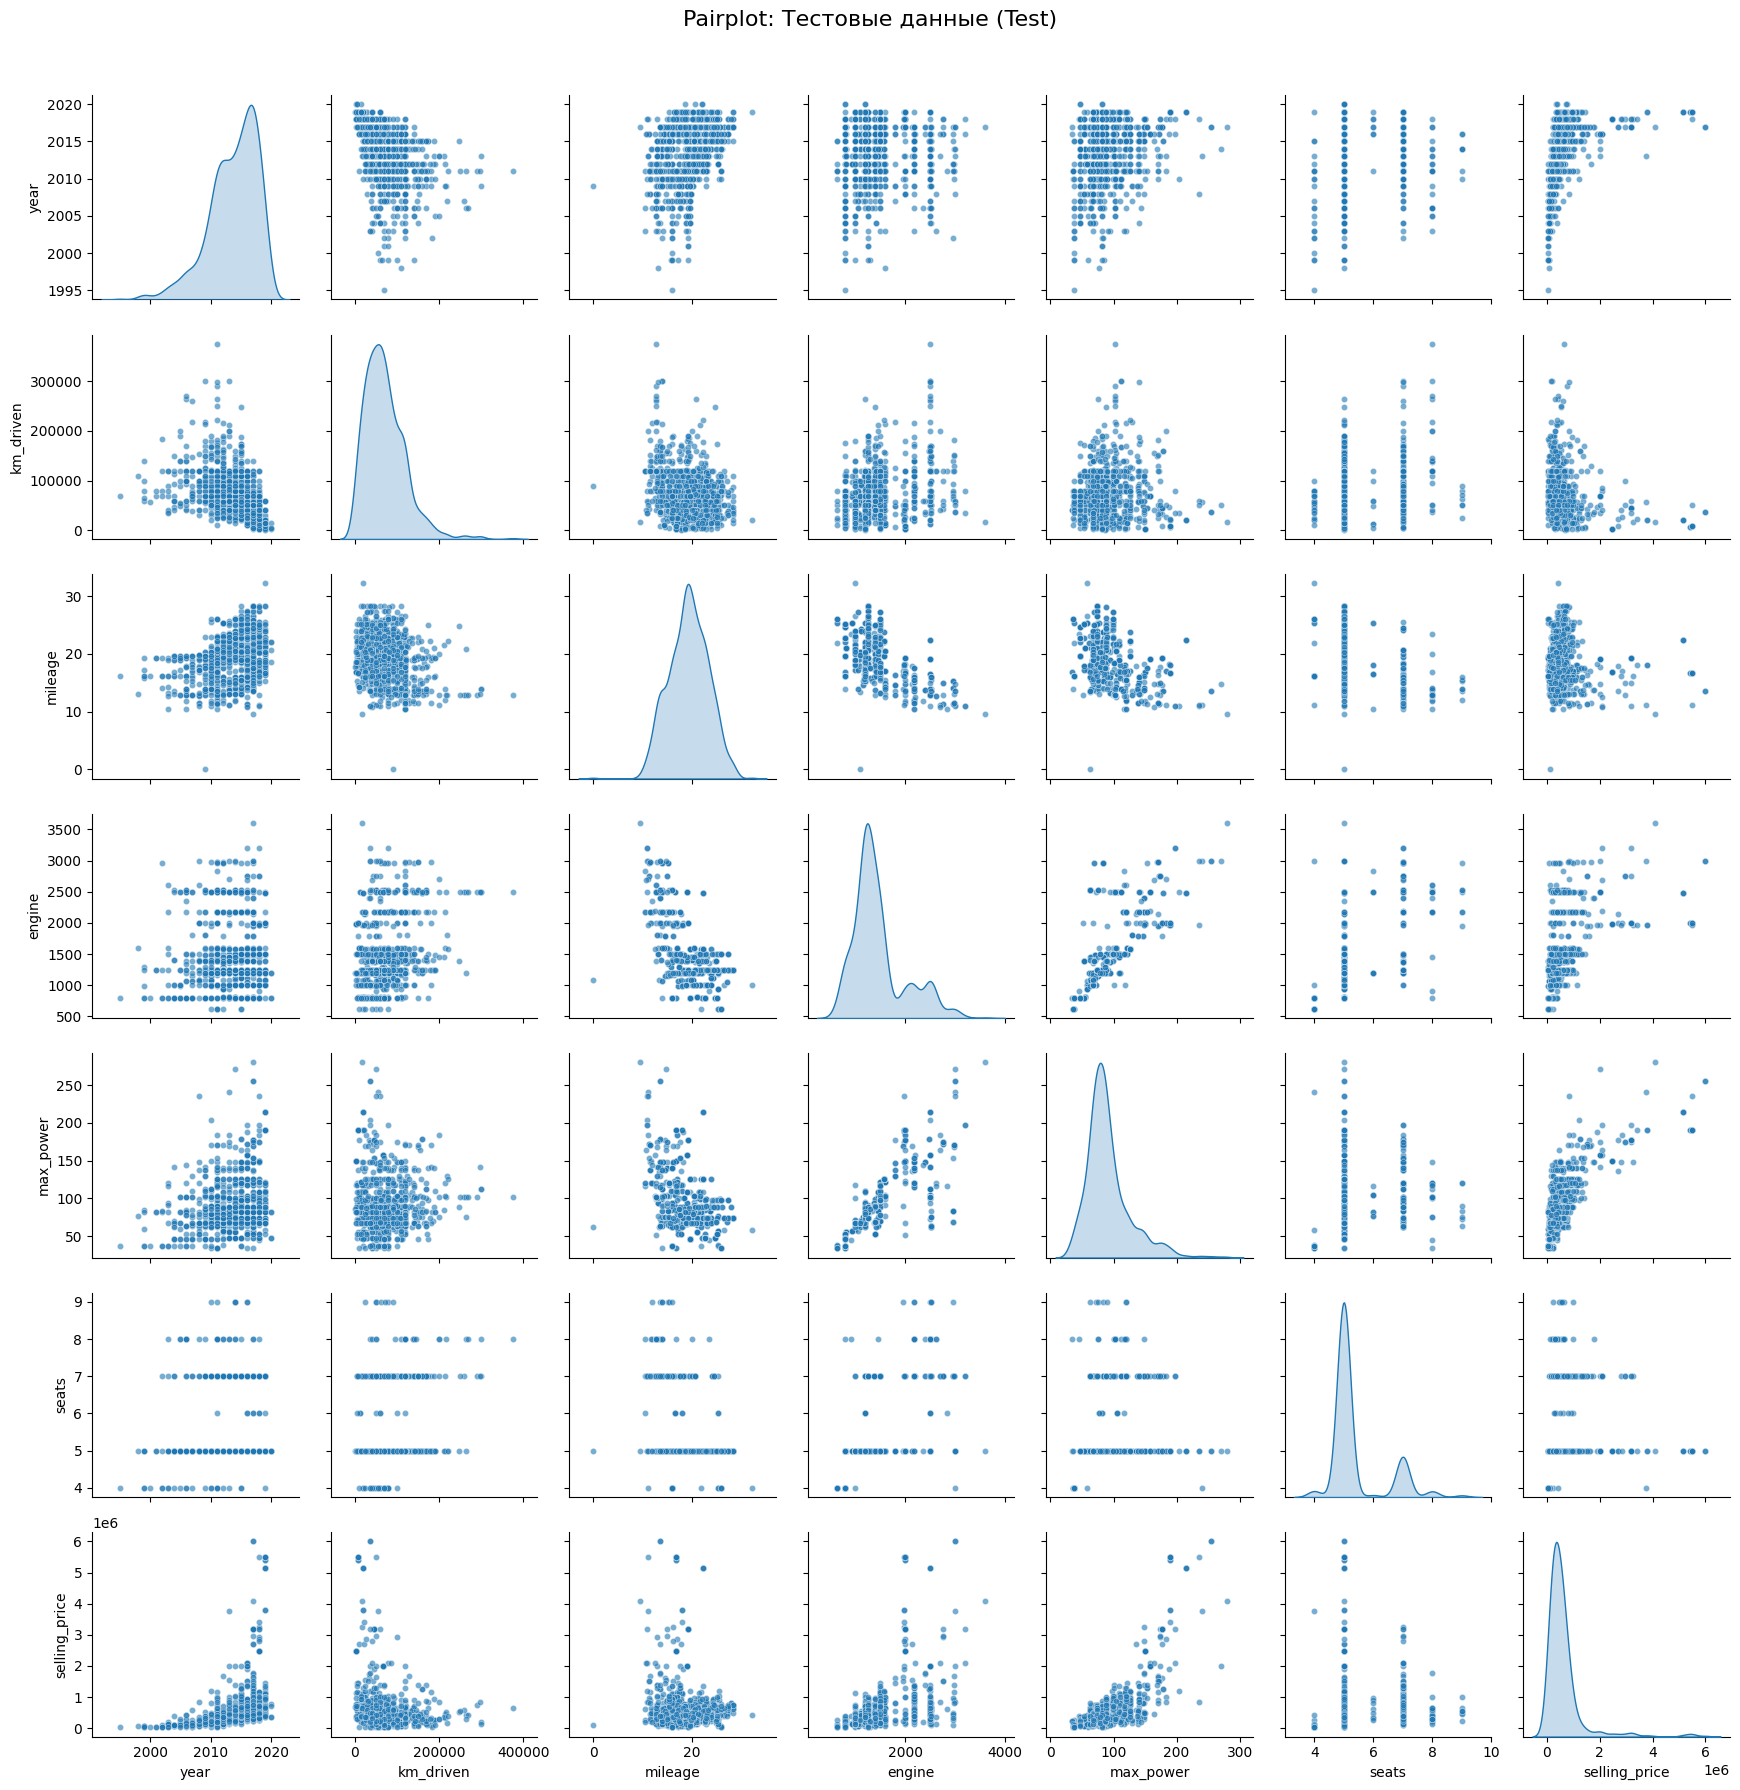

In [325]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

pairplot_train = sns.pairplot(
    df_test[numeric_features],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'fill': True}
)
pairplot_train.fig.suptitle('Pairplot: Тестовые данные (Test)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Выводы
#### Можно ли предположить на основе распределений связь признаков с целевой переменной?
  Да. Год, пробег, мощность сильно связаны с ценой

#### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
  Да. Например engine и mileage

#### Похожими ли оказались совокупности при разделении на трейн и тест?
  Да

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [X] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [X] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [326]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

corr_matrix = df_train[numeric_features].corr(method='pearson')
corr_matrix.round(3)

year  km_driven  mileage  engine  max_power  seats  \
year           1.000     -0.369    0.342   0.003      0.157  0.041   
km_driven     -0.369      1.000   -0.182   0.230      0.025  0.192   
mileage        0.342     -0.182    1.000  -0.573     -0.373 -0.451   
engine         0.003      0.230   -0.573   1.000      0.681  0.652   
max_power      0.157      0.025   -0.373   0.681      1.000  0.244   
seats          0.041      0.192   -0.451   0.652      0.244  1.000   
selling_price  0.427     -0.165   -0.104   0.448      0.693  0.150   

               selling_price  
year                   0.427  
km_driven             -0.165  
mileage               -0.104  
engine                 0.448  
max_power              0.693  
seats                  0.150  
selling_price          1.000

In [327]:
target_correlations = corr_matrix['selling_price'].drop('selling_price')
target_correlations_sorted = target_correlations.abs().sort_values(ascending=False)

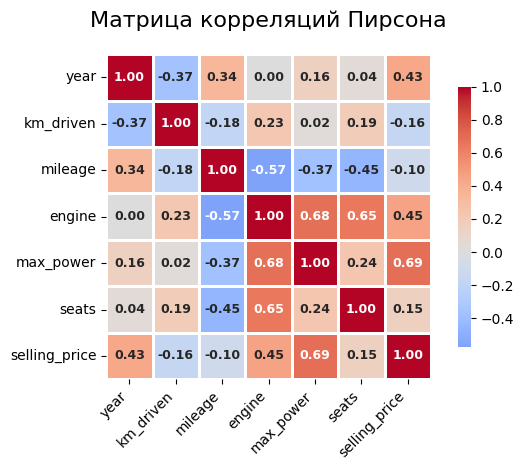

In [328]:
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9, "weight": "bold"}
)

plt.title('Матрица корреляций Пирсона', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- [X] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

### Какие 2 признака наименее скоррелированы между собой?
  year и engine имеют наименьшую корреляцию 0.003

### Между какими наблюдается довольно сильная положительная линейная зависимость?
  engine и max_power (0.681)

### Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
  Корреляция отрицательная (-0.369) - это подтверждает утверждение
  Умеренная сила связи (0.369)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [329]:
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [330]:
y_train = df_train['selling_price']
X_train = df_train[numerical_features]

y_test = df_test['selling_price']
X_test = df_test[numerical_features]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [X] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [X] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

base_linear_model = LinearRegression()
base_linear_model.fit(X_train, y_train)

LinearRegression()

In [332]:
def metrics(m: LinearRegression, Xt, yt, Xtest, ytest) -> None:
  y_train_pred = m.predict(Xt)

  mse_train = mean_squared_error(yt, y_train_pred)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(yt, y_train_pred)

  y_test_pred = m.predict(Xtest)

  mse_test = mean_squared_error(ytest, y_test_pred)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(ytest, y_test_pred)

  print(f"TRAIN (обучающая выборка):")
  print(f"  MSE (Mean Squared Error): {mse_train:.2f}")
  print(f"  RMSE (Root MSE): {rmse_train:.2f}")
  print(f"  R² (R-squared): {r2_train:.4f}")

  print(f"\nTEST (тестовая выборка):")
  print(f"  MSE (Mean Squared Error): {mse_test:.2f}")
  print(f"  RMSE (Root MSE): {rmse_test:.2f}")
  print(f"  R² (R-squared): {r2_test:.4f}")

In [333]:
metrics(base_linear_model, X_train, y_train, X_test, y_test)

TRAIN (обучающая выборка):
  MSE (Mean Squared Error): 116873067751.52
  RMSE (Root MSE): 341867.03
  R² (R-squared): 0.5923

TEST (тестовая выборка):
  MSE (Mean Squared Error): 233297548204.61
  RMSE (Root MSE): 483008.85
  R² (R-squared): 0.5941


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [334]:
from sklearn.preprocessing import StandardScaler

features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

In [335]:
X_train_scaled_df

year  km_driven   mileage    engine  max_power     seats
0     0.139570   1.191152  0.996413 -0.373643  -0.439701 -0.434419
1     0.139570   0.766619  0.429384  0.141162   0.493387 -0.434419
2    -0.837167   0.883158  0.896054 -0.068879   0.066037 -0.434419
3    -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.434419
4     0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.434419
...        ...        ...       ...       ...        ...       ...
5835 -1.325535   1.948653 -0.378507 -0.707236  -0.815845 -0.434419
5836 -0.104614  -0.398765 -0.132627 -0.888447  -0.657801 -0.434419
5837 -0.104614   0.600136 -0.232987 -0.478663  -0.159965 -0.434419
5838 -1.569719   0.749971 -0.659513  0.130865   0.698211 -0.434419
5839 -1.081351   0.766619 -0.032268 -0.373643  -0.442862 -0.434419

[5840 rows x 6 columns]

In [336]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_df, y_train)

LinearRegression()

In [337]:
metrics(model_scaled, X_train_scaled_df, y_train, X_test_scaled_df, y_test)

TRAIN (обучающая выборка):
  MSE (Mean Squared Error): 116873067751.52
  RMSE (Root MSE): 341867.03
  R² (R-squared): 0.5923

TEST (тестовая выборка):
  MSE (Mean Squared Error): 233297548204.60
  RMSE (Root MSE): 483008.85
  R² (R-squared): 0.5941


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [X] Какой признак оказался наиболее информативным в предсказании цены?

In [338]:
coefficients_df = pd.DataFrame({
    'Признак': features,
    'Коэффициент (β)': model_scaled.coef_,
    'Абсолютное значение': np.abs(model_scaled.coef_),
    'Ранг важности': np.argsort(np.abs(model_scaled.coef_))[::-1] + 1
}).sort_values('Абсолютное значение', ascending=False)

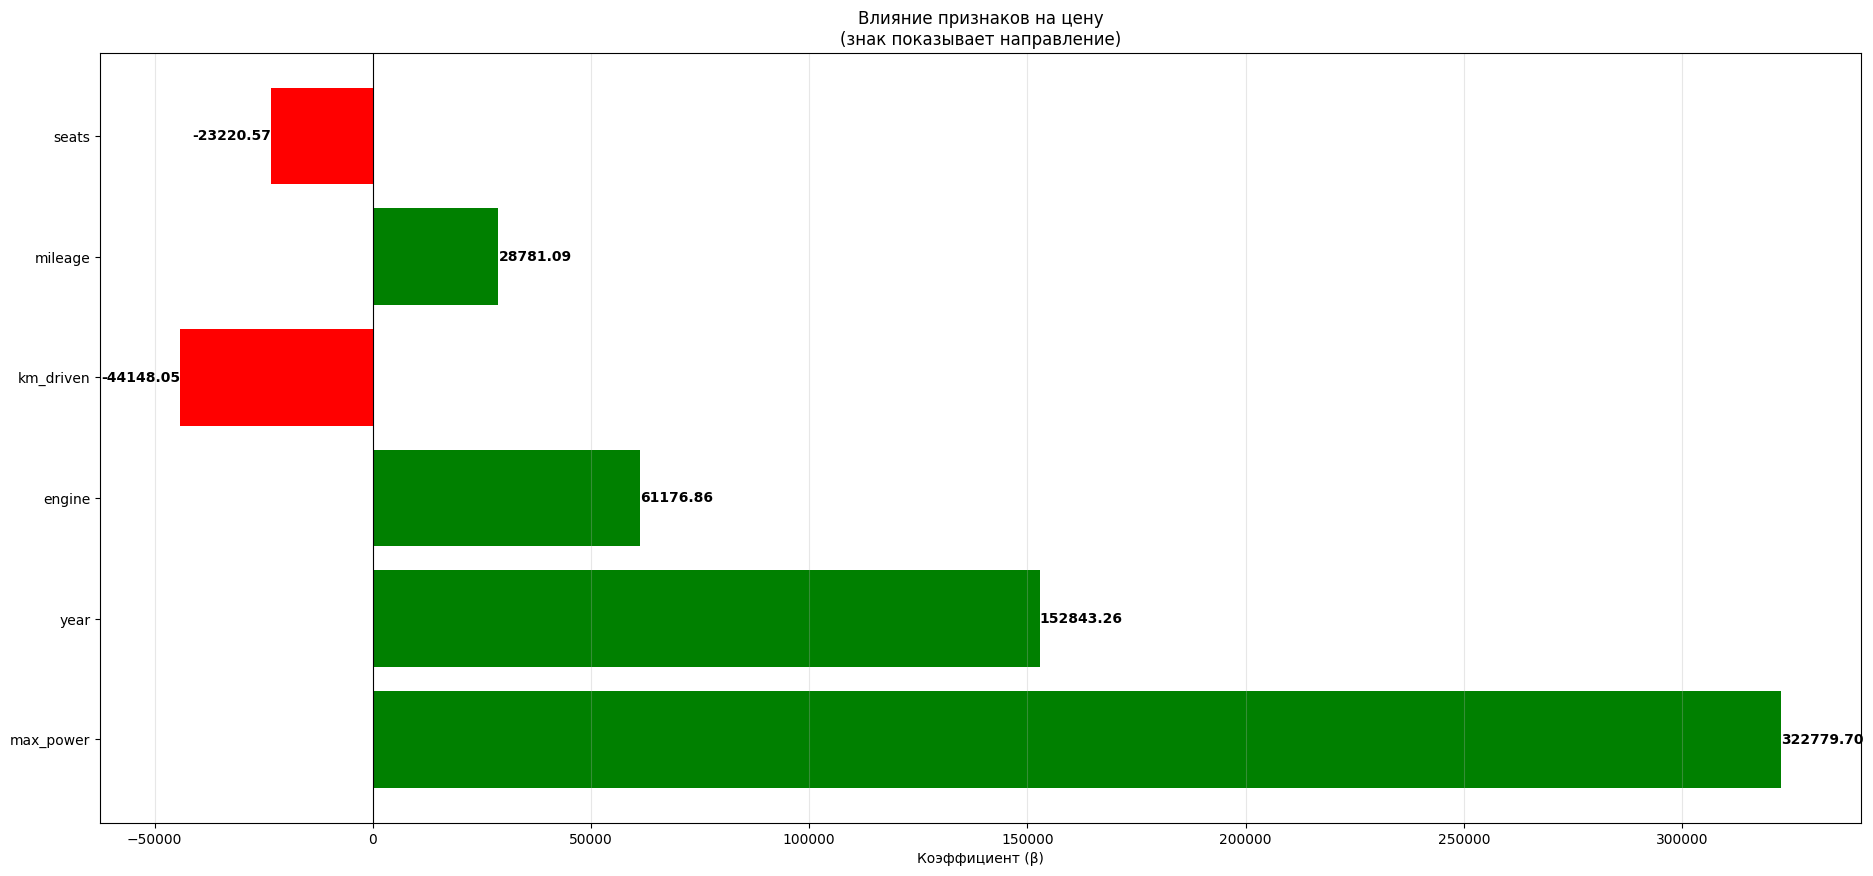

In [339]:
plt.figure(figsize=(50, 10))

plt.subplot(1, 2, 1)
colors = ['green' if coef > 0 else 'red' for coef in coefficients_df['Коэффициент (β)']]
bars1 = plt.barh(coefficients_df['Признак'], coefficients_df['Коэффициент (β)'], color=colors)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Коэффициент (β)')
plt.title('Влияние признаков на цену\n(знак показывает направление)')
plt.grid(axis='x', alpha=0.3)

for bar in bars1:
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.02),
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left' if width > 0 else 'right',
             va='center',
             fontweight='bold')

Самый важный - `max_power`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [X] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [X] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [367]:
from sklearn.linear_model import Lasso

base_lasso = Lasso(random_state=42)
base_lasso.fit(X_train_scaled_df, y_train)

Lasso(random_state=42)

In [370]:
coefs = pd.DataFrame({
    'feature': features,
    'coefficient': base_lasso.coef_,
    'is_zero': base_lasso.coef_ == 0
})
coefs

feature    coefficient  is_zero
0       year  152843.083853    False
1  km_driven  -44146.918538    False
2    mileage   28779.204085    False
3     engine   61172.025780    False
4  max_power  322780.586197    False
5      seats  -23217.693273    False

In [371]:
metrics(base_lasso, X_train_scaled_df, y_train, X_test_scaled_df, y_test)

TRAIN (обучающая выборка):
  MSE (Mean Squared Error): 116873067761.64
  RMSE (Root MSE): 341867.03
  R² (R-squared): 0.5923

TEST (тестовая выборка):
  MSE (Mean Squared Error): 233298219170.76
  RMSE (Root MSE): 483009.54
  R² (R-squared): 0.5941


Метрики толком не изменились

In [343]:
zero_features = coefs[coefs['is_zero']]['feature'].tolist()
len(zero_features)

0

Ни один коэффициент не был занулен, так как все признаки значимы

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [X] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [344]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
lasso = Lasso(random_state=42, max_iter=10000)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0, 10000.0]},
             scoring='neg_mean_squared_error')

In [345]:
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

total_models = len(param_grid['alpha']) * 10

num_zero_coefs = np.sum(best_model.coef_ == 0)

print(f"1. Количество обученных моделей: {total_models}")
print(f"2. Лучший коэффициент регуляризации: alpha = {best_alpha}")
print(f"3. Зануленные веса: {num_zero_coefs} из {len(features)} признаков")
print(f"4. Качество лучшей модели:")
print(f"   R² на train: {best_model.score(X_train_scaled, y_train):.4f}")
print(f"   R² на test:  {best_model.score(X_test_scaled, y_test):.4f}")

1. Количество обученных моделей: 90
2. Лучший коэффициент регуляризации: alpha = 1000.0
3. Зануленные веса: 0 из 6 признаков
4. Качество лучшей модели:
   R² на train: 0.5922
   R² на test:  0.5930


In [346]:
lasso_best_model = best_model

**Ваша задача 2:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [X] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [347]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

elastic = ElasticNet(random_state=42, max_iter=10000)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [348]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

total_combinations = len(param_grid['alpha']) * len(param_grid['l1_ratio'])
total_models = total_combinations * 10

In [349]:
print(f"1. Количество обученных моделей: {total_models}")
print(f"2. Лучшие гиперпараметры:")
print(f"   - alpha: {best_params['alpha']}")
print(f"   - l1_ratio: {best_params['l1_ratio']}")

print(f"3. Интерпретация лучшей модели:")
if best_params['l1_ratio'] == 1.0:
    print("   → Фактически это Lasso регрессия")
elif best_params['l1_ratio'] == 0.0:
    print("   → Фактически это Ridge регрессия")
else:
    print(f"   → {best_params['l1_ratio']*100:.0f}% L1 + {(1-best_params['l1_ratio'])*100:.0f}% L2 регуляризация")

print(f"4. Качество лучшей ElasticNet:")
print(f"   R² на train: {best_model.score(X_train_scaled, y_train):.4f}")
print(f"   R² на test:  {best_model.score(X_test_scaled, y_test):.4f}")

1. Количество обученных моделей: 360
2. Лучшие гиперпараметры:
   - alpha: 0.1
   - l1_ratio: 0.9
3. Интерпретация лучшей модели:
   → 90% L1 + 10% L2 регуляризация
4. Качество лучшей ElasticNet:
   R² на train: 0.5922
   R² на test:  0.5919


In [350]:
elastic_net_best = best_model

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [X] Удалить столбец`name`

In [351]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [352]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)

In [353]:
df_train

year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2010         225000     127000  Diesel  Individual       Manual   
3     2007         130000     120000  Petrol  Individual       Manual   
4     2017         440000      45000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
5835  2008         120000     191000  Petrol  Individual       Manual   
5836  2013         260000      50000  Petrol  Individual       Manual   
5837  2013         320000     110000  Petrol  Individual       Manual   
5838  2007         135000     119000  Diesel  Individual       Manual   
5839  2009         382000     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  seats  
0              First Owner    23.40    1248      74.00      5  
1             Second Owner    21.14    1498     103.52      5  
2              First Owner    23.00    1396      90.00      5  
3              First Owner    16.10    1298      88.20      5  
4              First Owner    20.14    1197      81.86      5  
...                    ...      ...     ...        ...    ...  
5835           First Owner    17.92    1086      62.10      5  
5836          Second Owner    18.90     998      67.10      5  
5837           First Owner    18.50    1197      82.85      5  
5838  Fourth & Above Owner    16.80    1493     110.00      5  
5839           First Owner    19.30    1248      73.90      5  

[5840 rows x 11 columns]

In [354]:
X_train = df_train[["fuel", "seller_type", "transmission", "owner", "seats"]]
y_train = df_train["selling_price"]

X_test = df_test[["fuel", "seller_type", "transmission", "owner", "seats"]]
y_test = df_test["selling_price"]

In [355]:
X_train = pd.concat([X_train, X_train_scaled_df.drop('seats', axis=1)], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df.drop('seats', axis=1)], axis=1)

In [356]:
X_train

fuel seller_type transmission                 owner  seats      year  \
0     Diesel  Individual       Manual           First Owner      5  0.139570   
1     Diesel  Individual       Manual          Second Owner      5  0.139570   
2     Diesel  Individual       Manual           First Owner      5 -0.837167   
3     Petrol  Individual       Manual           First Owner      5 -1.569719   
4     Petrol  Individual       Manual           First Owner      5  0.872122   
...      ...         ...          ...                   ...    ...       ...   
5835  Petrol  Individual       Manual           First Owner      5 -1.325535   
5836  Petrol  Individual       Manual          Second Owner      5 -0.104614   
5837  Petrol  Individual       Manual           First Owner      5 -0.104614   
5838  Diesel  Individual       Manual  Fourth & Above Owner      5 -1.569719   
5839  Diesel  Individual       Manual           First Owner      5 -1.081351   

      km_driven   mileage    engine  max_power  
0      1.191152  0.996413 -0.373643  -0.439701  
1      0.766619  0.429384  0.141162   0.493387  
2      0.883158  0.896054 -0.068879   0.066037  
3      0.766619 -0.835142 -0.270682   0.009142  
4     -0.482007  0.178486 -0.478663  -0.191257  
...         ...       ...       ...        ...  
5835   1.948653 -0.378507 -0.707236  -0.815845  
5836  -0.398765 -0.132627 -0.888447  -0.657801  
5837   0.600136 -0.232987 -0.478663  -0.159965  
5838   0.749971 -0.659513  0.130865   0.698211  
5839   0.766619 -0.032268 -0.373643  -0.442862  

[5840 rows x 10 columns]

In [357]:
X_test

fuel seller_type transmission         owner  seats      year  \
0    Diesel  Individual       Manual   First Owner      7 -0.837167   
1    Diesel  Individual       Manual   First Owner      5  0.872122   
2    Petrol  Individual    Automatic   First Owner      5 -1.569719   
3    Diesel  Individual       Manual   First Owner      5  0.383754   
4    Petrol  Individual       Manual  Second Owner      5 -0.592983   
..      ...         ...          ...           ...    ...       ...   
995  Petrol  Individual       Manual  Second Owner      5 -1.325535   
996  Petrol  Individual       Manual  Second Owner      5  0.872122   
997  Diesel  Individual       Manual   First Owner      5 -1.081351   
998  Petrol  Individual       Manual   First Owner      5 -0.348799   
999  Diesel  Individual       Manual   First Owner      5  0.627938   

     km_driven   mileage    engine  max_power  
0     1.565740 -1.362027  2.200379   0.761428  
1    -0.814974  0.519707  0.139102   0.650798  
2     2.405866 -1.638015  0.760986   1.330385  
3     1.648982  1.422940  0.141162   0.337872  
4    -0.065798 -0.734782 -0.530144  -0.724180  
..         ...       ...       ...        ...  
995   0.433652  0.095690 -0.707236  -0.627773  
996  -0.398765 -0.207897 -0.478663  -0.192206  
997  -0.565249  0.896054 -0.068879   0.066037  
998  -0.814974  0.233683 -0.478663  -0.284819  
999   0.600136  1.648748  0.141162   0.337872  

[1000 rows x 10 columns]

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [358]:
assert X_train.shape == (5840, 10)

In [359]:
X_train.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [X] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [360]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_onehot = onehot_encoder.fit_transform(df_train[categorical_features])
X_test_onehot = onehot_encoder.transform(df_test[categorical_features])

feature_names = onehot_encoder.get_feature_names_out(categorical_features)

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=feature_names, index=df_train.index)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=feature_names, index=df_test.index)

numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

X_train_final = pd.concat([df_train[numeric_features], X_train_onehot_df], axis=1)
X_test_final = pd.concat([df_test[numeric_features], X_test_onehot_df], axis=1)

In [361]:
X_train_final

year  km_driven  mileage  engine  max_power  fuel_Diesel  fuel_LPG  \
0     2014     145500    23.40    1248      74.00          1.0       0.0   
1     2014     120000    21.14    1498     103.52          1.0       0.0   
2     2010     127000    23.00    1396      90.00          1.0       0.0   
3     2007     120000    16.10    1298      88.20          0.0       0.0   
4     2017      45000    20.14    1197      81.86          0.0       0.0   
...    ...        ...      ...     ...        ...          ...       ...   
5835  2008     191000    17.92    1086      62.10          0.0       0.0   
5836  2013      50000    18.90     998      67.10          0.0       0.0   
5837  2013     110000    18.50    1197      82.85          0.0       0.0   
5838  2007     119000    16.80    1493     110.00          1.0       0.0   
5839  2009     120000    19.30    1248      73.90          1.0       0.0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0             0.0                     1.0                           0.0  ...   
1             0.0                     1.0                           0.0  ...   
2             0.0                     1.0                           0.0  ...   
3             1.0                     1.0                           0.0  ...   
4             1.0                     1.0                           0.0  ...   
...           ...                     ...                           ...  ...   
5835          1.0                     1.0                           0.0  ...   
5836          1.0                     1.0                           0.0  ...   
5837          1.0                     1.0                           0.0  ...   
5838          0.0                     1.0                           0.0  ...   
5839          0.0                     1.0                           0.0  ...   

      owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                      0.0                0.0      0.0      1.0      0.0   
1                      0.0                0.0      0.0      1.0      0.0   
2                      0.0                0.0      0.0      1.0      0.0   
3                      0.0                0.0      0.0      1.0      0.0   
4                      0.0                0.0      0.0      1.0      0.0   
...                    ...                ...      ...      ...      ...   
5835                   0.0                0.0      0.0      1.0      0.0   
5836                   0.0                0.0      0.0      1.0      0.0   
5837                   0.0                0.0      0.0      1.0      0.0   
5838                   0.0                0.0      0.0      1.0      0.0   
5839                   0.0                0.0      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  
0         0.0      0.0      0.0       0.0       0.0  
1         0.0      0.0      0.0       0.0       0.0  
2         0.0      0.0      0.0       0.0       0.0  
3         0.0      0.0      0.0       0.0       0.0  
4         0.0      0.0      0.0       0.0       0.0  
...       ...      ...      ...       ...       ...  
5835      0.0      0.0      0.0       0.0       0.0  
5836      0.0      0.0      0.0       0.0       0.0  
5837      0.0      0.0      0.0       0.0       0.0  
5838      0.0      0.0      0.0       0.0       0.0  
5839      0.0      0.0      0.0       0.0       0.0  

[5840 rows x 23 columns]

In [362]:
X_train_final.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [X] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [X] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [373]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

X_train = X_train_final.copy()
X_test = X_test_final.copy()

param_grid = {'alpha': np.logspace(-3, 3, 13)}
ridge = Ridge(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    ridge, param_grid, cv=cv, scoring='r2', n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             scoring='r2')

In [375]:
best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_

y_test_pred = best_ridge.predict(X_test)
r2_test_ridge = r2_score(y_test, y_test_pred)

r2_test_ridge

0.6259209947568354

Качество стало лучше

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [X] Реализуйте метрику `business_metric`
- [X] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [379]:
def business_metric(y_true, y_pred, threshold=0.1):
    errors = np.abs((y_true - y_pred) / y_true)
    within_threshold = (errors <= threshold).mean()
    return within_threshold

In [380]:
models = {
    "Base Linear Regression": base_linear_model,
    "Scaled Linear Regression": model_scaled,
    "Lasso": base_lasso,
    "Lasso GridSearch": lasso_best_model,
    "ElasticNet GridSearch": elastic_net_best,
    "Ridge GridSearch": best_ridge
}

metrics_results = {}
for name, model in models.items():
    print(name)
    if 'Ridge' in name:
      y_pred = model.predict(X_test)
    else:
      y_pred = model.predict(X_test_scaled_df)

    metrics_results[name] = business_metric(y_test, y_pred)

Base Linear Regression
Scaled Linear Regression
Lasso
Lasso GridSearch
ElasticNet GridSearch
Ridge GridSearch


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [381]:
best_model_name = max(metrics_results, key=metrics_results.get)
best_score = metrics_results[best_model_name]

print("Результаты бизнес-метрики:")
for name, score in metrics_results.items():
    print(f"{name}: {score:.3f}")

print(f"\nЛучшая модель: {best_model_name} с результатом {best_score:.3f}")

Результаты бизнес-метрики:
Base Linear Regression: 0.000
Scaled Linear Regression: 0.227
Lasso: 0.227
Lasso GridSearch: 0.225
ElasticNet GridSearch: 0.225
Ridge GridSearch: 0.249

Лучшая модель: Ridge GridSearch с результатом 0.249
